In [1]:
import numpy as np
import logging
from tqdm import tqdm

In [2]:
from optiLib.optimizers import RandomSearchOptimizer, ParticleSwarmOptimizer
from optiLib.problem import OptimizationProblem
from optiLib.helpers import print_solution, example_objective_function, example_constraints

In [3]:
# Создаем задачу оптимизации
problem = OptimizationProblem(example_objective_function, len=2,bounds=[(-10,10),(-10,10)],dtype=float)

# Инициализация оптимизатора
optimizer = ParticleSwarmOptimizer(problem)

# Запуск оптимизации
best_solution, best_value = optimizer.optimize()

Optimizing: 100%|██████████| 10000/10000 [00:12<00:00, 831.21it/s]


In [4]:
print_solution(best_solution, best_value)

Лучшее решение: [ 8.05502347 -9.66459003]
Значение целевой функции: -19.208502567886754


In [1]:
import networkx as nx
import numpy as np
from collections import defaultdict

def create_graph_from_matrix(matrix):
    G = nx.DiGraph()
    n = len(matrix)
    for i in range(n):
        for j in range(n):
            if matrix[i][j] > 0:
                G.add_edge(i, j, weight=matrix[i][j])
    return G

def critical_path(G):
    longest_path = nx.dag_longest_path(G, weight='weight')
    return longest_path


# Пример использования
matrix = [
[0, 1000, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 50, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

G = nx.DiGraph(np.array(matrix))

# Найти критический путь
critical = critical_path(G)
print("Критический путь:", ' -> '.join(map(str, critical)))
print(len(critical))


Критический путь: 0 -> 1 -> 4 -> 7 -> 10 -> 12
6


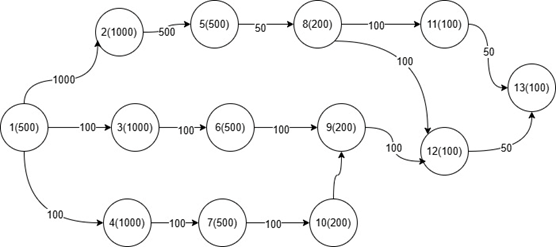

In [16]:
T_lim = 5


class Task:
    def __init__(self, id, duration):
        self.name = id
        self.duration = duration
        self.start = 0
        self.finish = 0

    def __str__(self):
        return (f"Задача {self.name}: продолжительность = {self.duration}, "
                f"\nCтарт = {self.start}, \tФиниш = {self.finish}")


T_NET = [Task(_, T_lim/len(critical)) if _ in critical else Task(_, 0) for _ in range(len(matrix))]

for i in critical:
    T_NET[i].start = T_lim/len(critical) * (i-1)
    T_NET[i].start = T_lim/len(critical) * (i)

In [ ]:
for i in T_NET:
    print(i)

In [2]:
len(matrix)

13

len(matrix)